In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
# Loading dataset
df = pd.read_csv('/Users/mahmoud/Desktop/Semester 5/PATTERN REGONITION AND ANALYSIS - A (STTHK3013)/STTHK3013_PRA_IndividualAssignment01/assgmt01_student_performance_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mahmoud/Desktop/Assignments/STTHK3013_PRA_IndividualAssignment01/assgmt01_student_performance_dataset.csv'

In [ ]:
# displaying the first few rows and summary information
print(df.head())
print(df.info())

   study_hours_per_week  attendance_rate  previous_exam_scores  \
0                  11.0        96.730000                 46.86   
1                  24.0        81.910000                 64.87   
2                  19.0        75.830000                 91.81   
3                  15.0        82.860000                 95.38   
4                  12.0        75.409618                 67.94   

   assignments_completed  extracurricular_participation  \
0               9.754032                            1.0   
1              18.000000                            0.0   
2              13.000000                            1.0   
3               3.000000                            0.0   
4              12.000000                            4.0   

   study_attendance_interaction  study_hours_per_week_squared  \
0                   1064.040000                         121.0   
1                   1310.810889                         576.0   
2                   1440.860000                      

In [ ]:
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
study_hours_per_week             4
attendance_rate                  3
previous_exam_scores             2
assignments_completed            4
extracurricular_participation    2
study_attendance_interaction     5
study_hours_per_week_squared     1
attendance_rate_squared          3
assignments_per_week             0
final_exam_score                 0
dtype: int64


In [ ]:
# getting a sense of the distribution of each feature
print(df.describe())

       study_hours_per_week  attendance_rate  previous_exam_scores  \
count            496.000000       497.000000            498.000000   
mean              17.514113        75.409618             71.136948   
std                7.954657        14.115931             17.636692   
min                5.000000        50.130000             40.010000   
25%               11.000000        63.030000             56.217500   
50%               18.000000        76.720000             71.800000   
75%               25.000000        87.050000             86.415000   
max               30.000000        99.880000             99.960000   

       assignments_completed  extracurricular_participation  \
count             496.000000                     498.000000   
mean                9.754032                       2.608434   
std                 6.095534                       1.695446   
min                 0.000000                       0.000000   
25%                 4.000000                       1.0

In [ ]:
# replacing missing values with the mean
df.fillna(df.mean(), inplace=True)

In [ ]:
# displaying the first few rows of the dataset after imputation
print("\nFirst five rows of the dataset:")
print(df.head())


First five rows of the dataset:
   study_hours_per_week  attendance_rate  previous_exam_scores  \
0                  11.0        96.730000                 46.86   
1                  24.0        81.910000                 64.87   
2                  19.0        75.830000                 91.81   
3                  15.0        82.860000                 95.38   
4                  12.0        75.409618                 67.94   

   assignments_completed  extracurricular_participation  \
0               9.754032                            1.0   
1              18.000000                            0.0   
2              13.000000                            1.0   
3               3.000000                            0.0   
4              12.000000                            4.0   

   study_attendance_interaction  study_hours_per_week_squared  \
0                   1064.040000                         121.0   
1                   1310.810889                         576.0   
2                   

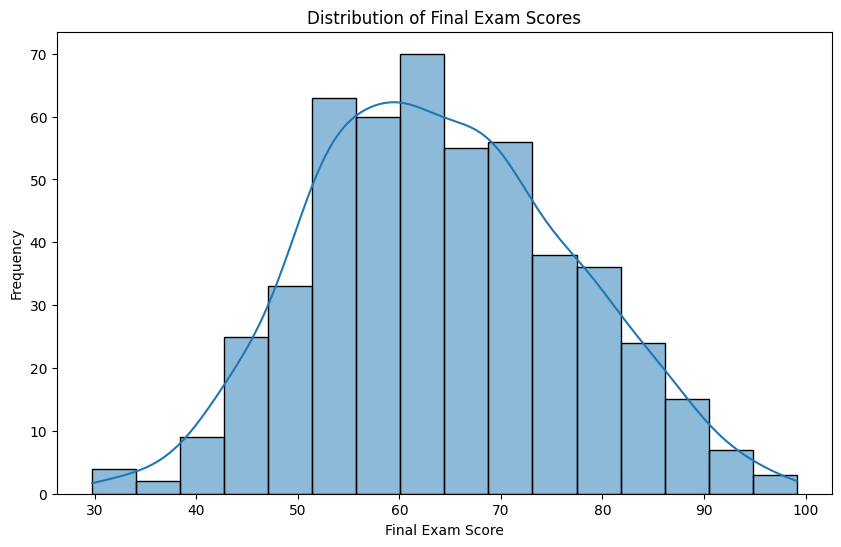

In [ ]:
# 4. Data Visualization
# Visualizing distributions of features
plt.figure(figsize=(10, 6))
sns.histplot(df['final_exam_score'], kde=True)
plt.title('Distribution of Final Exam Scores')
plt.xlabel('Final Exam Score')
plt.ylabel('Frequency')
plt.show()

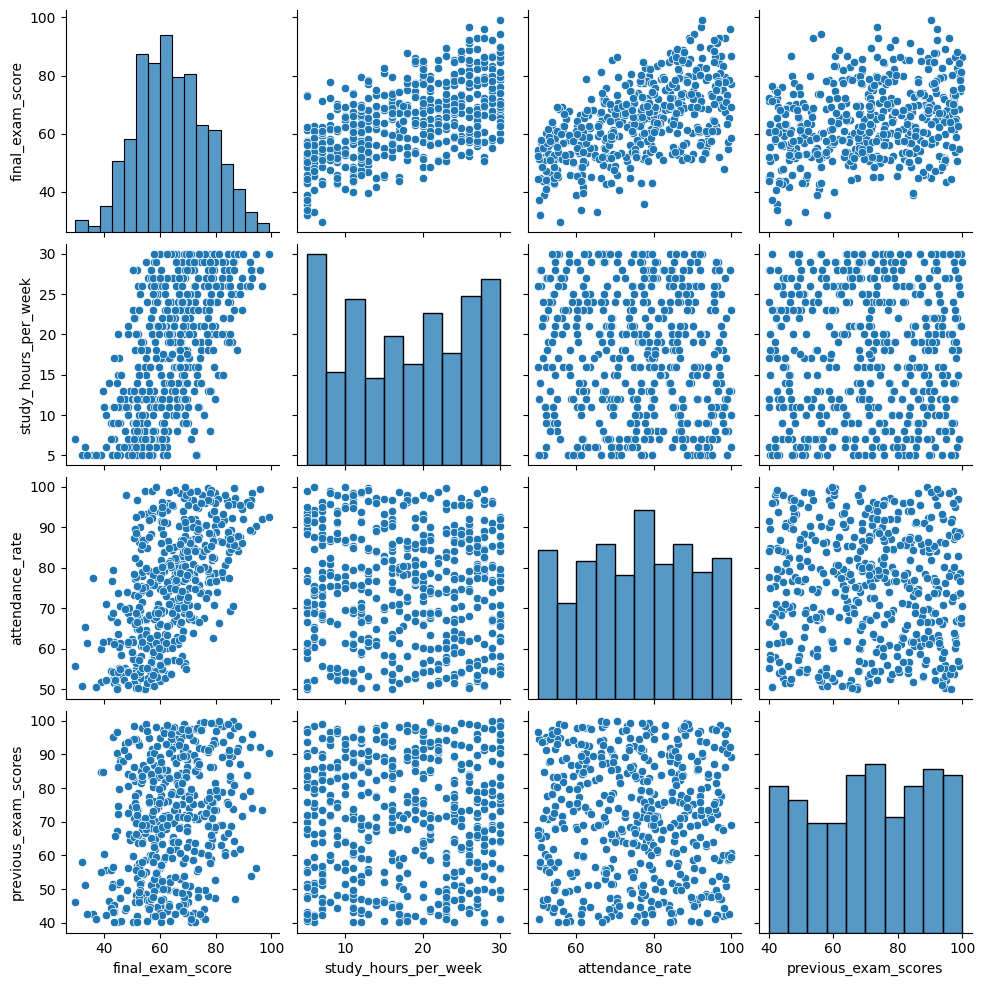

In [ ]:
# Pairplot to understand relationships between features
sns.pairplot(df[['final_exam_score', 'study_hours_per_week', 'attendance_rate', 'previous_exam_scores']])
plt.show()

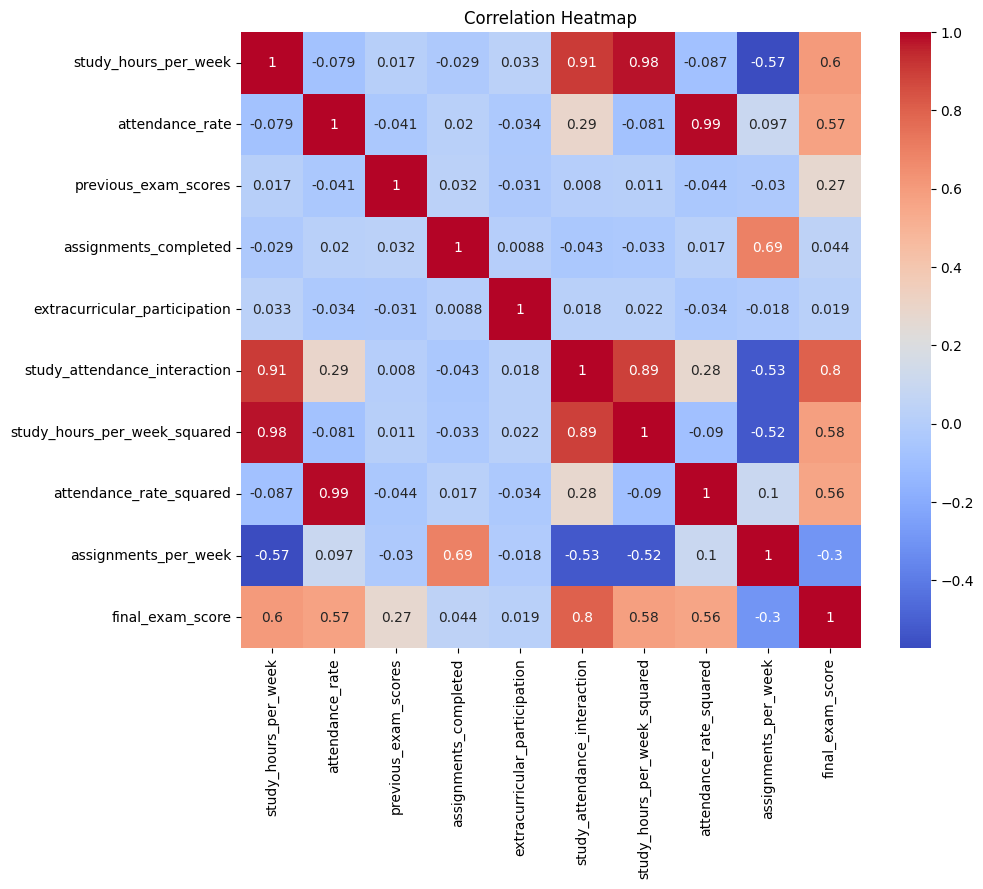

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Multicollinearity & Heteroscedasticity Evaluation
# Using statsmodels to detect multicollinearity
X = df.drop('final_exam_score', axis=1)
y = df['final_exam_score']
X = sm.add_constant(X)  # Adding a constant term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       final_exam_score   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     311.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          2.68e-196
Time:                        13:33:08   Log-Likelihood:                -1503.0
No. Observations:                 500   AIC:                             3026.
Df Residuals:                     490   BIC:                             3068.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
# Check Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor:")
print(vif_data)


Variance Inflation Factor:
                         Feature         VIF
0                          const  605.160528
1           study_hours_per_week   51.601731
2                attendance_rate   68.460171
3           previous_exam_scores    1.013879
4          assignments_completed    3.842006
5  extracurricular_participation    1.006394
6   study_attendance_interaction   22.697679
7   study_hours_per_week_squared   33.719433
8        attendance_rate_squared   61.917540
9           assignments_per_week    6.181578


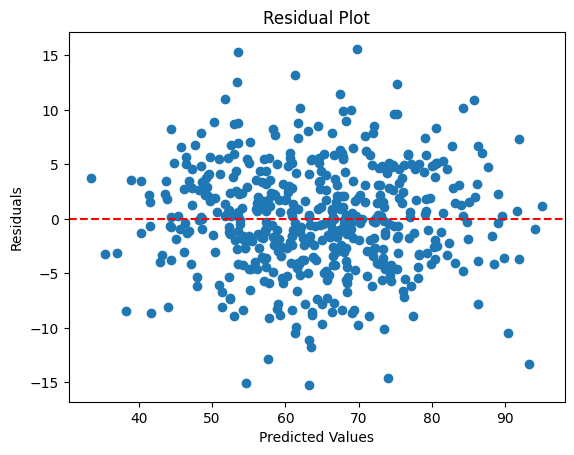

In [ ]:
# Residual Plot for Heteroscedasticity
y_pred = model.predict(X)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [ ]:
# Model Development
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Baseline Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
# Get the coefficients of the Lasso model
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_train.columns)

# Filter features with non-zero coefficients
important_features = lasso_coefficients[lasso_coefficients != 0]
print("Features with non-zero coefficients in Lasso Regression:")
print(important_features)


Features with non-zero coefficients in Lasso Regression:
study_hours_per_week             0.526661
attendance_rate                  0.354911
previous_exam_scores             0.213385
assignments_completed            0.107246
extracurricular_participation    0.148699
study_attendance_interaction     0.011138
study_hours_per_week_squared    -0.010161
attendance_rate_squared          0.000187
dtype: float64


In [ ]:
# Set up RidgeCV with a range of alpha values
alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)

# Fit the model with cross-validation
ridge_cv.fit(X_train, y_train)


RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Best alpha value
best_alpha = ridge_cv.alpha_
print(f"Best alpha for Ridge Regression: {best_alpha}")

# Use the best alpha to train the Ridge model
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

Best alpha for Ridge Regression: 100.0


In [ ]:
# Model Evaluation
# Evaluating all three models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R² Score: {r2:.2f}")

In [ ]:
# Evaluate Baseline Linear Regression
evaluate_model(y_test, y_pred_linear, "Baseline Linear Regression")

# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")

Baseline Linear Regression - Mean Squared Error: 28.66, R² Score: 0.82
Lasso Regression - Mean Squared Error: 28.41, R² Score: 0.82
Ridge Regression - Mean Squared Error: 28.41, R² Score: 0.82
